## **Implementation of Linear Regression and Random Forest model**

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# read csv file
df = pd.read_csv("Spotify_Dataset_V3.csv", delimiter=";")

# check data
print(df.head())
print(df.info())

   Rank            Title                     Artists        Date  \
0     1  Ella Baila Sola  Eslabon Armado, Peso Pluma  29/05/2023   
1     1  Ella Baila Sola  Eslabon Armado, Peso Pluma  29/05/2023   
2     2   WHERE SHE GOES                   Bad Bunny  29/05/2023   
3     3  La Bebe - Remix       Yng Lvcas, Peso Pluma  29/05/2023   
4     3  La Bebe - Remix       Yng Lvcas, Peso Pluma  29/05/2023   

   Danceability  Energy  Loudness  Speechiness  Acousticness  \
0         0.668   0.758   -5176.0        0.033         0.483   
1         0.668   0.758   -5176.0        0.033         0.483   
2         0.652   0.800   -4019.0        0.061         0.143   
3         0.812   0.479   -5678.0        0.333         0.213   
4         0.812   0.479   -5678.0        0.333         0.213   

   Instrumentalness  Valence # of Artist   Artist (Ind.) # of Nationality  \
0             0.000    0.834    Artist 1  Eslabon Armado    Nationality 1   
1             0.000    0.834    Artist 2      Peso P

### Data preparation

check is there any empty value and drop duplicates

In [2]:
print(df.isnull().sum())
df = df.drop_duplicates(subset=['id', 'Title', 'Date', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence'])

Rank                                0
Title                               0
Artists                             0
Date                                0
Danceability                        0
Energy                              0
Loudness                            0
Speechiness                         0
Acousticness                        0
Instrumentalness                    0
Valence                             0
# of Artist                         0
Artist (Ind.)                       0
# of Nationality                    0
Nationality                         0
Continent                           0
Points (Total)                      0
Points (Ind for each Artist/Nat)    0
id                                  0
Song URL                            0
dtype: int64


drop features we don't need

In [3]:
df = df.drop(columns=['Song URL','# of Nationality','Nationality','Continent'])
print(df.shape)
df.head()

(468746, 16)


Rank              Title                     Artists        Date  \
0     1    Ella Baila Sola  Eslabon Armado, Peso Pluma  29/05/2023   
2     2     WHERE SHE GOES                   Bad Bunny  29/05/2023   
3     3    La Bebe - Remix       Yng Lvcas, Peso Pluma  29/05/2023   
5     4  Cupid - Twin Ver.                 FIFTY FIFTY  29/05/2023   
6     5          un x100to   Grupo Frontera, Bad Bunny  29/05/2023   

   Danceability  Energy  Loudness  Speechiness  Acousticness  \
0         0.668   0.758   -5176.0        0.033         0.483   
2         0.652   0.800   -4019.0        0.061         0.143   
3         0.812   0.479   -5678.0        0.333         0.213   
5         0.783   0.592   -8332.0        0.033         0.435   
6         0.569   0.724   -4076.0        0.047         0.228   

   Instrumentalness  Valence # of Artist   Artist (Ind.)  Points (Total)  \
0             0.000    0.834    Artist 1  Eslabon Armado             200   
2             0.629    0.234    Artist 1       Bad Bunny             199   
3             0.000    0.559    Artist 1       Yng Lvcas             198   
5             0.000    0.726    Artist 1     FIFTY FIFTY             197   
6             0.000    0.562    Artist 1  Grupo Frontera             196   

   Points (Ind for each Artist/Nat)                      id  
0                             100.0  3qQbCzHBycnDpGskqOWY0E  
2                             199.0  7ro0hRteUMfnOioTFI5TG1  
3                              99.0  2UW7JaomAMuX9pZrjVpHAU  
5                             197.0  7FbrGaHYVDmfr7KoLIZnQ7  
6                              98.0  6pD0ufEQq0xdHSsRbg9LBK

standardize data and K-means  

In [4]:
# Choose needed features for identify genres
features = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']]

# standardize data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Exception in thread Thread-5 (_readerthread):
Traceback (most recent call last):
  File "d:\Anaconda\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "d:\Anaconda\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "d:\Anaconda\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "d:\Anaconda\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 27: invalid start byte
d:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
'NoneType' object has no attribute 'splitlines'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to u

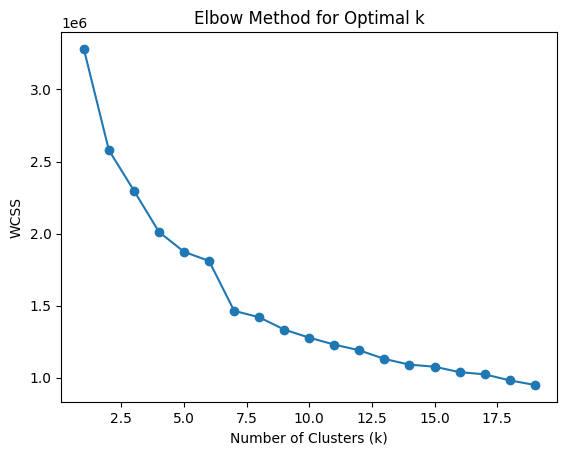

In [5]:
wcss = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# generate elbow plot
plt.plot(range(1, 20), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
df['Genre'] = kmeans.fit_predict(features_scaled)  # The original clustering results are stored in the Cluster column

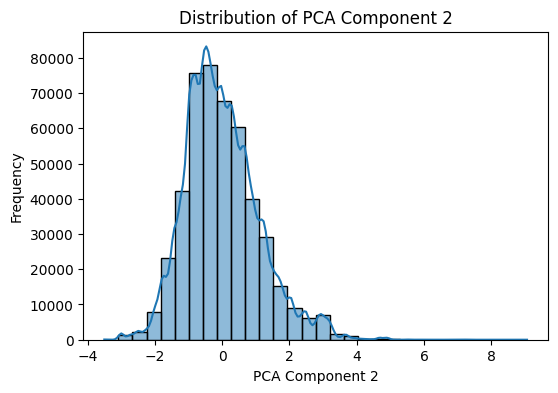

In [6]:
# The data is reduced to two dimensions using PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(features_pca, columns=['PCA Component 1', 'PCA Component 2'])
for column in pca_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(pca_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

PCA and data filter(base on Gaussian distribution)

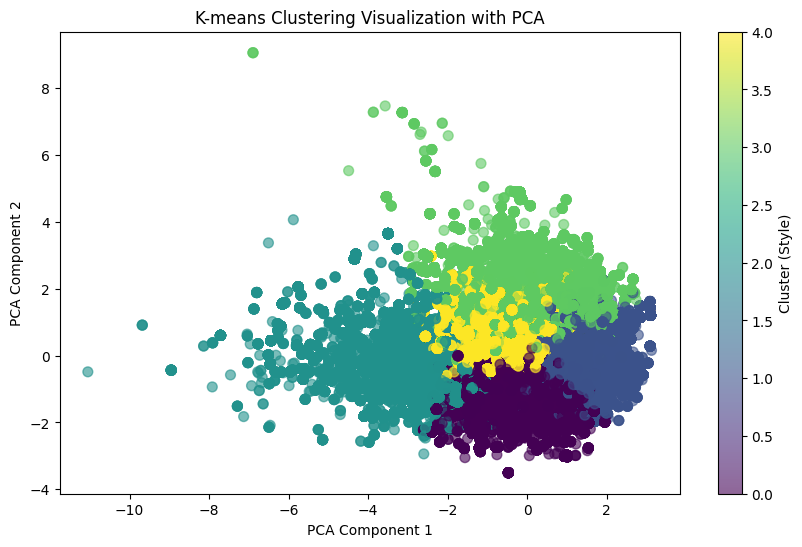

(459485, 17)


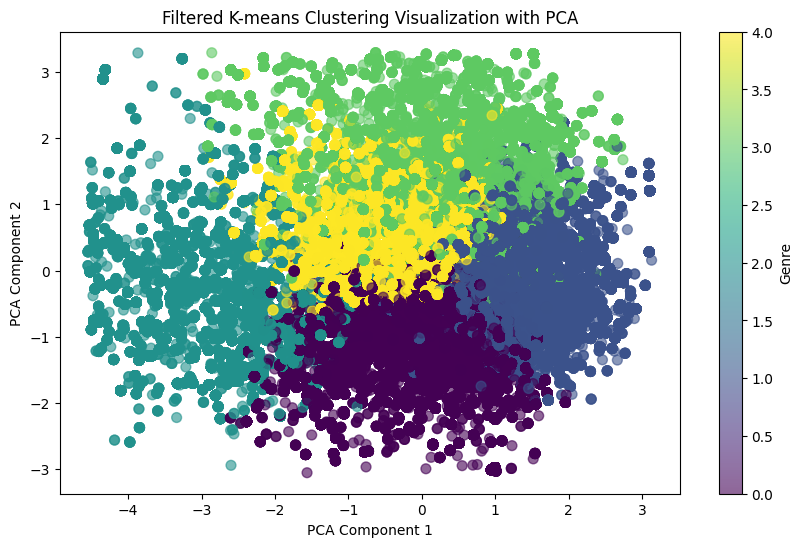

In [7]:
# Plot a scatter plot of the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=df['Genre'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Cluster (Style)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering Visualization with PCA')
plt.show()


# Calculate the mean and standard deviation of features after dimensionality reduction
mean_pca = np.mean(features_pca, axis=0)
std_pca = np.std(features_pca, axis=0)

# Set a threshold (3 standard deviations here)
threshold = 3

# z-score of each data point 
z_scores = np.abs((features_pca - mean_pca) / std_pca)

# filter outliers
outliers = (z_scores > threshold).any(axis=1)
non_outliers = ~outliers
filtered_data = features_pca[~outliers]
filtered_clusters = df['Genre'][non_outliers]
df = df[non_outliers].reset_index(drop=True)
print(df.shape)

# Visualize the data after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data[:, 0], filtered_data[:, 1], c=filtered_clusters, cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Genre')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Filtered K-means Clustering Visualization with PCA')
plt.show()

Base on the characteristic of each genre, we give them specific category (Only to show, we still use numbers to represent genres in modeling as it's more convenient)

In [8]:
cluster_characteristics = df.groupby('Genre')[['Danceability', 'Energy', 'Loudness', 'Speechiness', 
                                                 'Acousticness', 'Instrumentalness', 'Valence']].mean()
print(cluster_characteristics)

# Creating a mapping dictionary
genre_mapping = {
    0: "Rock or Alternative",
    1: "Dance or Electronic",
    2: "Jazz or Classical",
    3: "Hippop or Rap",
    4: "Pop or R&B"
}

       Danceability    Energy     Loudness  Speechiness  Acousticness  \
Genre                                                                   
0          0.582097  0.684415 -4991.073024     0.063593      0.117468   
1          0.747473  0.754278 -3688.942739     0.082366      0.165495   
2          0.528063  0.419775 -7546.066938     0.057832      0.646948   
3          0.734111  0.628750 -5910.092886     0.305196      0.206158   
4          0.776477  0.542914 -7129.651286     0.084010      0.257264   

       Instrumentalness   Valence  
Genre                              
0              0.007194  0.343734  
1              0.001889  0.704452  
2              0.033013  0.321288  
3              0.003719  0.482767  
4              0.005006  0.486125  


In [9]:
# Convert date to year
df['Year'] = pd.to_datetime(df['Date'], dayfirst=True).dt.year

# Calculate the total score for each genre per year and convert it to a scale
genre_trends = df.groupby(['Year', 'Genre'])['Points (Total)'].sum().unstack().fillna(0)

# Total score of each year
yearly_totals = genre_trends.sum(axis=1)

# Divide the score for each genre by the total score for the year to get the ratio
genre_trends_ratio = genre_trends.div(yearly_totals, axis=0)

# ratio of genre
print(genre_trends_ratio)
# the proportion of data of 2023 of the overall data
print(len(df[df['Year'] == 2023]) / len(df))


Genre         0         1         2         3         4
Year                                                   
2017   0.249303  0.371339  0.049695  0.129716  0.199947
2018   0.249930  0.318146  0.071080  0.151481  0.209363
2019   0.170678  0.328152  0.089726  0.175376  0.236068
2020   0.167450  0.335561  0.111024  0.169406  0.216559
2021   0.183378  0.366855  0.139338  0.103604  0.206825
2022   0.268098  0.340680  0.119052  0.113119  0.159051
2023   0.287800  0.319792  0.134299  0.102039  0.156070
0.06346017824303296


In [10]:
df.head()

Rank              Title                     Artists        Date  \
0     1    Ella Baila Sola  Eslabon Armado, Peso Pluma  29/05/2023   
1     2     WHERE SHE GOES                   Bad Bunny  29/05/2023   
2     3    La Bebe - Remix       Yng Lvcas, Peso Pluma  29/05/2023   
3     4  Cupid - Twin Ver.                 FIFTY FIFTY  29/05/2023   
4     5          un x100to   Grupo Frontera, Bad Bunny  29/05/2023   

   Danceability  Energy  Loudness  Speechiness  Acousticness  \
0         0.668   0.758   -5176.0        0.033         0.483   
1         0.652   0.800   -4019.0        0.061         0.143   
2         0.812   0.479   -5678.0        0.333         0.213   
3         0.783   0.592   -8332.0        0.033         0.435   
4         0.569   0.724   -4076.0        0.047         0.228   

   Instrumentalness  Valence # of Artist   Artist (Ind.)  Points (Total)  \
0             0.000    0.834    Artist 1  Eslabon Armado             200   
1             0.629    0.234    Artist 1       Bad Bunny             199   
2             0.000    0.559    Artist 1       Yng Lvcas             198   
3             0.000    0.726    Artist 1     FIFTY FIFTY             197   
4             0.000    0.562    Artist 1  Grupo Frontera             196   

   Points (Ind for each Artist/Nat)                      id  Genre  Year  
0                             100.0  3qQbCzHBycnDpGskqOWY0E      1  2023  
1                             199.0  7ro0hRteUMfnOioTFI5TG1      0  2023  
2                              99.0  2UW7JaomAMuX9pZrjVpHAU      3  2023  
3                             197.0  7FbrGaHYVDmfr7KoLIZnQ7      4  2023  
4                              98.0  6pD0ufEQq0xdHSsRbg9LBK      0  2023

Get training and test dataset

In [11]:
# timeline (how close to 2017)
df['Year_Diff'] = df['Year'] - 2017  # 0 for music product in 2017, 7 for 2024(prediction)

# Make sure 'Date' is listed as the date type
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Time ordering
df = df.sort_values(by='Date')

# Divide the training set and the test set by time
split_index = int(len(df) * 0.8)

train_data = df.iloc[:split_index]  # earlier 80%
test_data = df.iloc[split_index:]  # later 20%

print(f"size of training set: {len(train_data)}")
print(f"size of test set: {len(test_data)}")
print("Training set time range:", train_data['Date'].min(), "to", train_data['Date'].max())
print("Test set time range:", test_data['Date'].min(), "to", test_data['Date'].max())

size of training set: 367588
size of test set: 91897
Training set time range: 2017-01-01 00:00:00 to 2022-02-18 00:00:00
Test set time range: 2022-02-18 00:00:00 to 2023-05-29 00:00:00


### Modeling

**Linear Regression**

This cell is the performance evaluation part of linear regression. The output includes the number of training sets and test sets, MSE, MSA, and R^2 on the two sets.

In [12]:
# Define features and goals for predicting popular artists
genre_features = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness', 
    'Acousticness', 'Instrumentalness', 'Valence', 
    'Genre'
]
genre_target = 'Points (Total)'

# The first 80% is divided into the training set, and the last 20% is divided into the test set.
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]
print(len(train_data))
print(len(test_data))

X_train_artist = train_data[genre_features]
y_train_artist = train_data[genre_target]
X_test_artist = test_data[genre_features]
y_test_artist = test_data[genre_target]

# Initialize the linear regression model
linear_model = LinearRegression()

# Training a Linear Regression Model
linear_model.fit(X_train_artist, y_train_artist)

# Calculate the training set, MSE
train_predictions = linear_model.predict(X_train_artist)
train_mse = mean_squared_error(y_train_artist, train_predictions)
train_mae = mean_absolute_error(y_train_artist, train_predictions)
train_r2 = r2_score(y_train_artist, train_predictions)

# Calculate the test set, MSE
test_predictions = linear_model.predict(X_test_artist)
test_mse = mean_squared_error(y_test_artist, test_predictions)
test_mae = mean_absolute_error(y_test_artist, test_predictions)
test_r2 = r2_score(y_test_artist, test_predictions)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

print(f"Training MAE: {train_mae}")
print(f"Testing MAE: {test_mae}")

print(f"Testing R^2: {train_r2}")
print(f"Testing R^2: {test_r2}")


367588
91897
Training MSE: 3324.990356475312
Testing MSE: 3347.1349308895155
Training MAE: 49.8972880197594
Testing MAE: 50.164502398437044
Testing R^2: 0.004159915141889292
Testing R^2: 0.0033687406782390017


This section is the linear regression prediction for 2024. The output includes a list of prediction results and visualization (not included in the report)

Predicted Genre Scores for 2024:
  Genre  Predicted_Score_2024
1     1          1.611459e+06
0     0          1.099537e+06
2     2          8.239941e+05
4     4          7.815446e+05
3     3          4.891140e+05
The most likely popular genre in 2024 is: 1


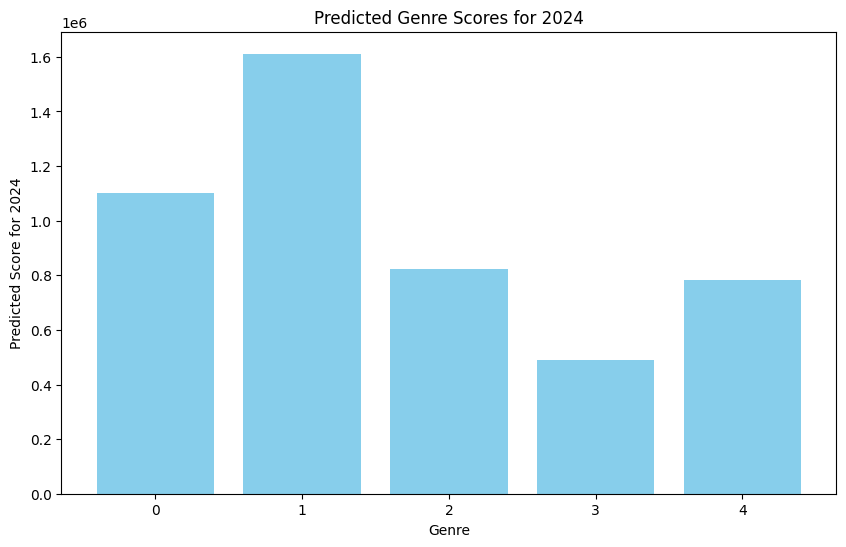

In [13]:
# Add year column as feature
genre_trends['Year'] = genre_trends.index

# Feature and target construction
X_train = genre_trends[['Year']].values 
y_train = genre_trends.drop('Year', axis=1).values  

X_test = np.array([[2024]]) 

# Train a linear regression model and predict
model = LinearRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)  

# Organizing prediction results
genres = genre_trends.columns[:-1] 
predicted_results = pd.DataFrame({
    'Genre': genres,
    'Predicted_Score_2024': y_pred[0]
}).sort_values(by='Predicted_Score_2024', ascending=False)

# Output prediction results
print("Predicted Genre Scores for 2024:")
print(predicted_results)

# Find the most popular genres in 2024
most_popular_genre = predicted_results.iloc[0]['Genre']
print(f"The most likely popular genre in 2024 is: {most_popular_genre}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(predicted_results['Genre'], predicted_results['Predicted_Score_2024'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Predicted Score for 2024')
plt.title('Predicted Genre Scores for 2024')
plt.show()



**Random Forest**

This cell models RF for training, and check its performance

In [14]:
# Define the features and target used to predict popular music genres
genre_features = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness', 
    'Acousticness', 'Instrumentalness', 'Valence', 
    'Genre', 'Year_Diff'
]
genre_target = 'Points (Total)'

# identify training set and test set
X_train_genre = train_data[genre_features]
y_train_genre = train_data[genre_target]
X_test_genre = test_data[genre_features]
y_test_genre = test_data[genre_target]

# Random forest model
rf_genre = RandomForestRegressor(
    n_estimators=100, 
    max_depth=9,  
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=5,    
    random_state=42
)

# Evaluate model performance using cross-validation
cv_mse = cross_val_score(rf_genre, X_train_genre, y_train_genre, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(rf_genre, X_train_genre, y_train_genre, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(rf_genre, X_train_genre, y_train_genre, cv=5, scoring='r2')

# Take the average of the cross-validation
mean_cv_mse = -np.mean(cv_mse)  # Take a negative number, because sklearn returns negative MSE
mean_cv_mae = -np.mean(cv_mae)
mean_cv_r2 = np.mean(cv_r2)

rf_genre.fit(X_train_genre, y_train_genre)

# Loss of training set
train_predictions_genre = rf_genre.predict(X_train_genre)
train_mse_genre = mean_squared_error(y_train_genre, train_predictions_genre)
train_mae_genre = mean_absolute_error(y_train_genre, train_predictions_genre)
train_r2_genre = r2_score(y_train_genre, train_predictions_genre)

# Loss of test set
test_data['Predicted_Genre_Score'] = rf_genre.predict(X_test_genre)
test_mse_genre = mean_squared_error(y_test_genre, test_data['Predicted_Genre_Score'])
test_mae_genre = mean_absolute_error(y_test_genre, test_data['Predicted_Genre_Score'])
test_r2_genre = r2_score(y_test_genre, test_data['Predicted_Genre_Score'])

# The total score for each genre in the test set
genre_scores = test_data.groupby('Genre')['Predicted_Genre_Score'].sum()

top_5_genres = genre_scores.nlargest(5)

print("The top five music genres most likely to be popular in the future:")
for genre, score in zip(top_5_genres.index, top_5_genres):
    print(f"Genre: {genre}, Predicted Total Score: {score}")

# numerical values to judge the performance of the model
print("Cross-Validation Results (5-Fold):")
print(f"Mean CV MSE (Genre): {mean_cv_mse}")
print(f"Mean CV MAE (Genre): {mean_cv_mae}")
print(f"Mean CV R² (Genre): {mean_cv_r2}")
print()
print(f"Training MSE (Genre): {train_mse_genre}")
print(f"Training MAE (Genre): {train_mae_genre}")
print(f"Training R² (Genre): {train_r2_genre}")
print(f"Testing MSE (Genre): {test_mse_genre}")
print(f"Testing MAE (Genre): {test_mae_genre}")
print(f"Testing R² (Genre): {test_r2_genre}")

The top five music genres most likely to be popular in the future:
Genre: 1, Predicted Total Score: 3228881.6797427284
Genre: 0, Predicted Total Score: 2423731.3041642937
Genre: 4, Predicted Total Score: 1368156.1484088262
Genre: 2, Predicted Total Score: 1137269.9386327728
Genre: 3, Predicted Total Score: 950873.1636700552
Cross-Validation Results (5-Fold):
Mean CV MSE (Genre): 3319.302634241857
Mean CV MAE (Genre): 49.455183351109355
Mean CV R² (Genre): 0.00580708523157254

Training MSE (Genre): 2842.8028905909673
Training MAE (Genre): 45.61561924160782
Training R² (Genre): 0.14857585487796854
Testing MSE (Genre): 3276.4042383526807
Testing MAE (Genre): 48.95221417823803
Testing R² (Genre): 0.024429265763480368


C:\Users\Haoyu\AppData\Local\Temp\ipykernel_38048\4009863530.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Genre_Score'] = rf_genre.predict(X_test_genre)


Real popular music genres

In [15]:
# Make sure the 'Genre' column exists in the test set
test_data['Genre_Label'] = test_data['Genre'] 

# Calculate the actual total score for each music genre
actual_genre_scores = test_data.groupby('Genre_Label')['Points (Total)'].sum()

top_5_actual_genres = actual_genre_scores.nlargest(5)

print("top five musical genres that were actually the most popular in test set:")
for genre, score in zip(top_5_actual_genres.index, top_5_actual_genres):
    print(f"Genre: {genre}, Total Actual Score: {score}")

top five musical genres that were actually the most popular in test set:
Genre: 1, Total Actual Score: 3047233
Genre: 0, Total Actual Score: 2531810
Genre: 4, Total Actual Score: 1474031
Genre: 2, Total Actual Score: 1148226
Genre: 3, Total Actual Score: 1018985


C:\Users\Haoyu\AppData\Local\Temp\ipykernel_38048\4171969098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Genre_Label'] = test_data['Genre']


Final prediction of Random Forest model

In [16]:
#train on the whole data and make final prediction

final_train_data = df[df['Year'] <= 2023]
X_final_genre = final_train_data[genre_features]
y_final_genre = final_train_data[genre_target]

rf_final_genre = RandomForestRegressor(
    n_estimators=100, 
    max_depth=9,  
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=5,    
    random_state=42
)
rf_final_genre.fit(X_final_genre, y_final_genre)

# Construct forecast data for 2024
# Make sure the 'Date' column is a date type
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Time ordering
df = df.sort_values(by='Date')

# Get the later 20% data
latest_20_percent_index = int(len(df) * 0.8)
latest_20_percent_data = df.iloc[latest_20_percent_index:].copy()

# Structure of features in 2024
future_genre_data = latest_20_percent_data.copy()

future_genre_data['Year'] = 2024
future_genre_data['Year_Diff'] = 7  # time diff

target_columns = [col for col in genre_features if col not in ['Genre', 'Year_Diff']]

# Superimposed random disturbance
noise = np.random.normal(loc=0, scale=0.01, size=future_genre_data[target_columns].shape)
future_genre_data[target_columns] += noise
for col in target_columns:
    future_genre_data[col] = future_genre_data[col]  

X_future_genre = future_genre_data[genre_features]


future_genre_data['Predicted_Score'] = rf_final_genre.predict(X_future_genre)

genre_scores_2024 = future_genre_data.groupby('Genre')['Predicted_Score'].sum()

top_5_genre_2024 = genre_scores_2024.nlargest(5)

print("The top five music genres most likely to be popular in 2024:")
for genre, score in zip(top_5_genre_2024.index, top_5_genre_2024):
    print(f"Genre: {genre}, Predicted Total Score: {score}")

The top five music genres most likely to be popular in 2024:
Genre: 1, Predicted Total Score: 3112090.0618196544
Genre: 0, Predicted Total Score: 2443693.9843860227
Genre: 4, Predicted Total Score: 1383659.4585652235
Genre: 2, Predicted Total Score: 1097046.6228554596
Genre: 3, Predicted Total Score: 968158.8808995497
